In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar, minimize
from time import time
import sys
sys.path.append('..')

In [2]:
from osd import Problem
from osd.components import GaussNoise, SmoothSecondDifference, SmoothFirstDifference
import cvxpy as cvx

In [3]:
np.random.seed(42)
t = np.linspace(0, 1000, 3000)
signal1 = (np.sin(2 * np.pi * t * 5 / (500.))
           + np.cos(2 * np.pi * t * 7 / (550.) + np.sin(2 * np.pi * t * 13 / (550.))))
y = signal1 + 0.25 * np.random.randn(len(signal1))

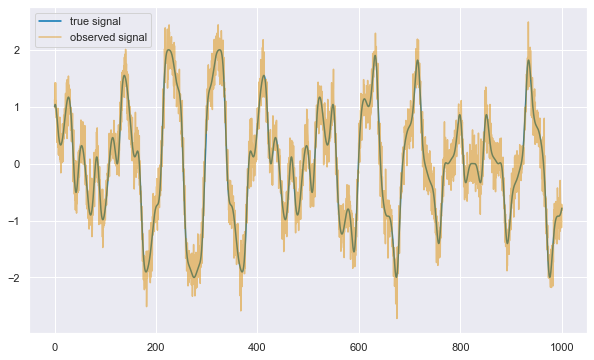

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(t, signal1, label='true signal')
plt.plot(t, y, alpha=0.5, label='observed signal')
plt.legend()
plt.show()

## First-Order Difference Smoothing

In [5]:
problem = Problem(data=y, components=[GaussNoise, SmoothFirstDifference])
problem.optimize_parameters(solver='MOSEK')
problem.components[1].parameters[0].value

12.679735911385714

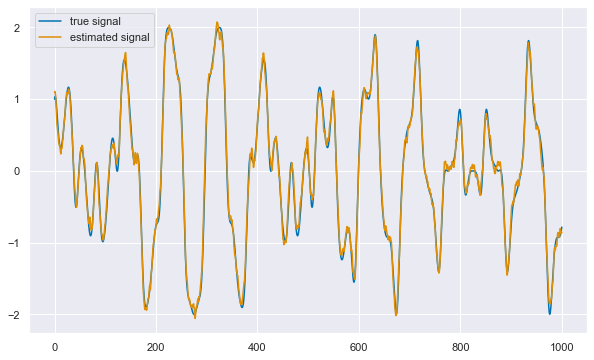

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(t, signal1, label='true signal')
plt.plot(t, problem.estimates[1], label='estimated signal')
plt.legend()
plt.show()

In [7]:
problem.holdout_validation(solver='MOSEK', seed=42)

39.97863349853954

## Second-Order Difference Smoothing

In [8]:
problem = Problem(data=y, components=[GaussNoise, SmoothSecondDifference])
problem.optimize_parameters(solver='MOSEK')
problem.components[1].parameters[0].value

1078.8926659579201

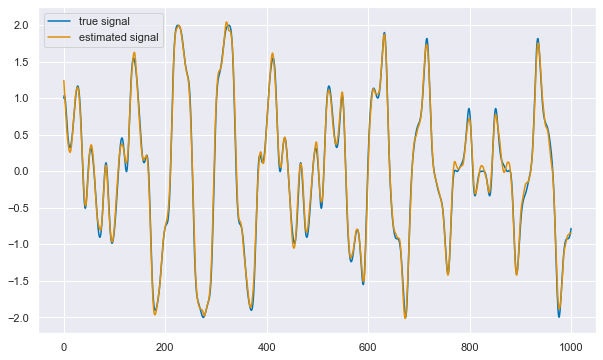

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(t, signal1, label='true signal')
plt.plot(t, problem.estimates[1], label='estimated signal')
plt.legend()
plt.show()

In [10]:
problem.holdout_validation(solver='MOSEK', seed=42)

38.43595196565018